In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

from tqdm import trange

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

## **Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтерпретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньої обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи функціі) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

### В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



### Process_bank_churn

File for preprocessing in my Github [process_bank_churn.py](https://github.com/nvkoval/ML_for_people_course/blob/main/process_bank_churn.py)

In [2]:
%load_ext autoreload
%autoreload all

from process_bank_churn import preprocess_data
from process_bank_churn import preprocess_new_data

In [3]:
data_dir = './data/bank-customer-churn-prediction/'
raw_df = pd.read_csv(data_dir + 'train.csv', index_col=0)

In [4]:
data_dict = preprocess_data(raw_df,
                            target_col='Exited',
                            scaler_numeric=True,
                            impute_strategy='median')

In [5]:
data_dict.keys()

dict_keys(['train_X', 'train_y', 'val_X', 'val_y', 'scaler', 'encoder', 'input_cols', 'numeric_cols', 'categorical_cols'])

In [6]:
data_dict['train_X'].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
id,,,,,,,,,,,,
9741,0.577566,0.267857,0.9,0.000000,0.333333,1.0,0.0,0.605266,0.0,0.0,1.0,1.0
1161,0.408115,0.089286,0.3,0.000000,0.333333,1.0,1.0,0.322215,1.0,0.0,0.0,1.0
6114,0.610979,0.321429,0.1,0.000000,0.333333,1.0,0.0,0.824146,0.0,0.0,1.0,0.0
14137,0.704057,0.214286,1.0,0.578383,0.333333,1.0,1.0,0.284496,0.0,1.0,0.0,1.0
10960,0.653938,0.303571,0.5,0.593046,0.333333,1.0,0.0,0.454370,0.0,1.0,0.0,1.0


In [7]:
test_df = pd.read_csv(data_dir + 'test.csv')

In [8]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [9]:
test_df_preprocess = preprocess_new_data(
    test_df,
    input_cols=data_dict['input_cols'],
    numeric_cols=data_dict['numeric_cols'],
    categorical_cols=data_dict['categorical_cols'],
    encoder=data_dict['encoder'],
    scaler=data_dict['scaler']
)

In [10]:
test_df_preprocess.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,1.0
1,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,1.0
2,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,1.0
3,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,1.0
4,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,1.0


#### `LogisticRegression`

Let's test our functions with a simple `LogisticRegression` model and evaluate its performance on both the training and validation sets.

In [11]:
def compute_auroc(model, data_dict):
    predict_train_y = model.predict_proba(data_dict['train_X'])[:, 1]
    predict_val_y = model.predict_proba(data_dict['val_X'])[:, 1]
    train_auroc = roc_auc_score(data_dict['train_y'], predict_train_y)
    val_auroc = roc_auc_score(data_dict['val_y'], predict_val_y)
    return train_auroc, val_auroc

In [12]:
model = LogisticRegression(solver='liblinear', random_state=24)
model.fit(data_dict['train_X'], data_dict['train_y'])

LogisticRegression(random_state=24, solver='liblinear')

In [13]:
train_auroc, val_auroc = compute_auroc(model, data_dict)

In [14]:
print(f"AUROC on Train: {train_auroc:.3f}")
print(f"AUROC on Validation: {val_auroc:.3f}")

AUROC on Train: 0.883
AUROC on Validation: 0.873


## **Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

#### `DecisionTreeClassifier`

In [15]:
model = DecisionTreeClassifier(random_state=24)
model.fit(data_dict['train_X'], data_dict['train_y'])

DecisionTreeClassifier(random_state=24)

In [16]:
train_auroc, val_auroc = compute_auroc(model, data_dict)

In [17]:
print(f"AUROC on Train: {train_auroc:.3f}")
print(f"AUROC on Validation: {val_auroc:.3f}")

AUROC on Train: 1.000
AUROC on Validation: 0.762


Our model `DecisionTreeClassifier` with default parameters tends to overfit the data.

In [18]:
model.get_depth()

28

The depth of the trained decision tree model is 28.

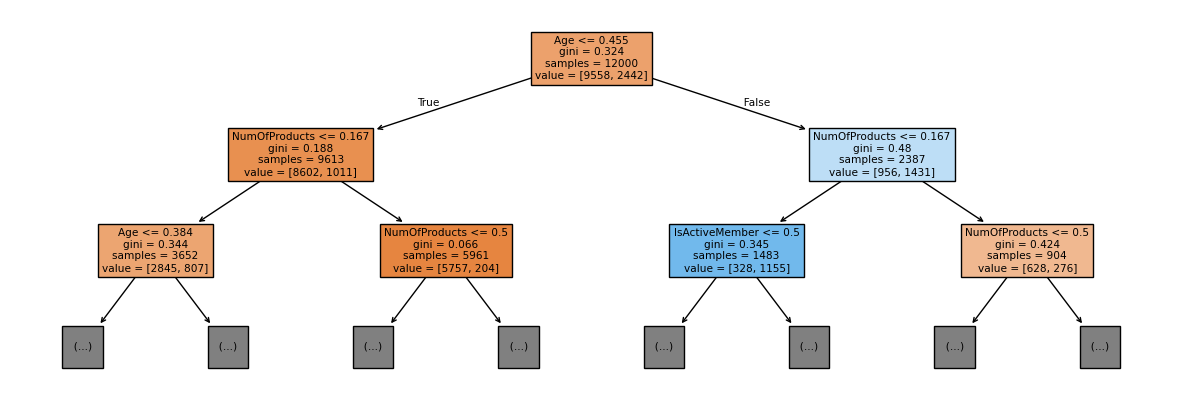

In [19]:
plt.figure(figsize=(15, 5))
plot_tree(model,
          max_depth=2,
          feature_names=data_dict['train_X'].columns,
          filled=True)
plt.show()

At a depth of 2, our model uses the we following features for splitting: `Age`, `NumOfProducts`, and `IsActiveMember`.

In [20]:
importance_df = pd.DataFrame({
    'feature': data_dict['train_X'].columns,
    'importance': model.feature_importances_,
}).sort_values('importance', ascending=False)

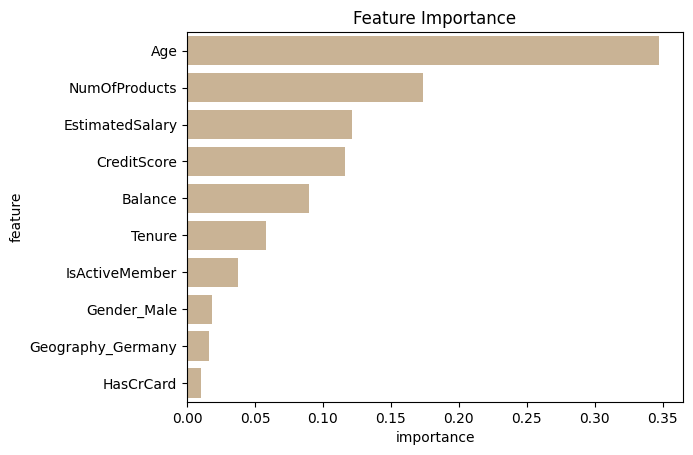

In [21]:
plt.title('Feature Importance')
sns.barplot(data=importance_df[:10],
            x='importance', y='feature', color='tan')
plt.show()

The most important features are  `Age` and `NumOfProducts`.

#### `DecisionTreeClassifier` without scaling

Let's test the same `DecisionTreeClassifier` model on the dataset without applying scaling and compare the results. This will help us the determine whether feature scaling has a significant impact on model performance.

In [22]:
data_dict = preprocess_data(raw_df, target_col='Exited', scaler_numeric=False)

In [23]:
model = DecisionTreeClassifier(random_state=24)
model.fit(data_dict['train_X'], data_dict['train_y'])

train_auroc, val_auroc = compute_auroc(model, data_dict)
print(f"AUROC on Train: {train_auroc:.3f}")
print(f"AUROC on Validation: {val_auroc:.3f}")

AUROC on Train: 1.000
AUROC on Validation: 0.763


In [24]:
model.get_depth()

28

We obtain the same results, confirming that decision trees do not require feature scaling, as they are not sensitive to variance in the data.

## **Завдання 3**. 
Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [25]:
def try_parameters(max_depth, max_leaf_nodes):
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   max_leaf_nodes=max_leaf_nodes,
                                   random_state=24)
    model.fit(data_dict['train_X'], data_dict['train_y'])
    train_auroc, val_auroc = compute_auroc(model, data_dict)
    return {
        'Max Depth': max_depth,
        'Max Leaf Nodes': max_leaf_nodes,
        'AUROC on Train': train_auroc.round(3),
        'AUROC on Validation': val_auroc.round(3),
    }

In [26]:
try_parameters(max_depth=3, max_leaf_nodes=None)

{'Max Depth': 3,
 'Max Leaf Nodes': None,
 'AUROC on Train': np.float64(0.897),
 'AUROC on Validation': np.float64(0.892)}

In [27]:
try_parameters(max_depth=5, max_leaf_nodes=None)

{'Max Depth': 5,
 'Max Leaf Nodes': None,
 'AUROC on Train': np.float64(0.927),
 'AUROC on Validation': np.float64(0.913)}

In [28]:
try_parameters(max_depth=7, max_leaf_nodes=None)

{'Max Depth': 7,
 'Max Leaf Nodes': None,
 'AUROC on Train': np.float64(0.942),
 'AUROC on Validation': np.float64(0.905)}

In [29]:
try_parameters(max_depth=6, max_leaf_nodes=None)

{'Max Depth': 6,
 'Max Leaf Nodes': None,
 'AUROC on Train': np.float64(0.936),
 'AUROC on Validation': np.float64(0.91)}

In [30]:
try_parameters(max_depth=5, max_leaf_nodes=30)

{'Max Depth': 5,
 'Max Leaf Nodes': 30,
 'AUROC on Train': np.float64(0.927),
 'AUROC on Validation': np.float64(0.914)}

In [31]:
try_parameters(max_depth=5, max_leaf_nodes=20)

{'Max Depth': 5,
 'Max Leaf Nodes': 20,
 'AUROC on Train': np.float64(0.918),
 'AUROC on Validation': np.float64(0.911)}

In [32]:
try_parameters(max_depth=5, max_leaf_nodes=25)

{'Max Depth': 5,
 'Max Leaf Nodes': 25,
 'AUROC on Train': np.float64(0.924),
 'AUROC on Validation': np.float64(0.919)}

In [33]:
try_parameters(max_depth=5, max_leaf_nodes=22)

{'Max Depth': 5,
 'Max Leaf Nodes': 22,
 'AUROC on Train': np.float64(0.918),
 'AUROC on Validation': np.float64(0.911)}

In [34]:
try_parameters(max_depth=5, max_leaf_nodes=27)

{'Max Depth': 5,
 'Max Leaf Nodes': 27,
 'AUROC on Train': np.float64(0.924),
 'AUROC on Validation': np.float64(0.915)}

The best result on validation set is 0.919 for `max_depth = 5` and `max_leaf_nodes = 25`

## **Завдання 4**. 
В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залежність між AUROC на трейн і валідаційних даних і номером ітерації.

#### `max_depth`

In [35]:
def try_max_depth(max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=24)
    model.fit(data_dict['train_X'], data_dict['train_y'])
    train_auroc, val_auroc = compute_auroc(model, data_dict)
    return {
        'Max Depth': max_depth,
        'AUROC on Train': train_auroc,
        'AUROC on Validation': val_auroc,
    }

In [36]:
errors_df = pd.DataFrame([try_max_depth(md) for md in range(1, 21)])

In [37]:
errors_df.style.background_gradient(subset='AUROC on Validation')

,Max Depth,AUROC on Train,AUROC on Validation
0,1,0.742987,0.741820
1,2,0.843677,0.843822
2,3,0.897117,0.891813
3,4,0.911720,0.909247
4,5,0.926966,0.912870
5,6,0.935531,0.910204
6,7,0.941893,0.904903
7,8,0.950047,0.892835
8,9,0.960317,0.863603
9,10,0.971925,0.829700


The best result on validation set is 0.912870 for `max_depth = 5`

In [38]:
max_auc = errors_df.loc[errors_df['AUROC on Validation'].idxmax(), 'Max Depth']

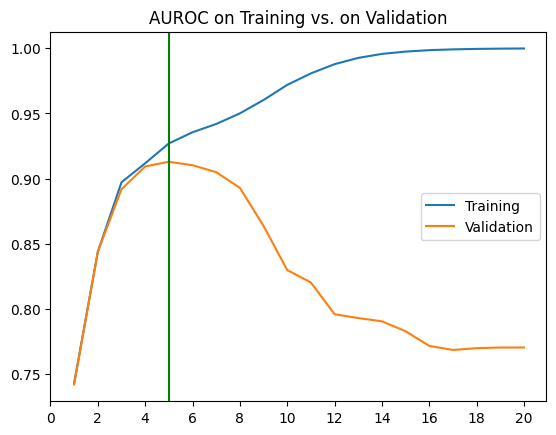

In [39]:
plt.plot(errors_df['Max Depth'], errors_df['AUROC on Train'])
plt.plot(errors_df['Max Depth'], errors_df['AUROC on Validation'])
plt.axvline(max_auc, ls='-', c='g')
plt.title('AUROC on Training vs. on Validation')
plt.xticks(range(0, 21, 2))
plt.legend(['Training', 'Validation'])
plt.show()


#### `max_leaf_nodes`

In [40]:
def try_max_leaf_nodes(max_leaf_nodes):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,
                                   random_state=24)
    model.fit(data_dict['train_X'], data_dict['train_y'])
    train_auroc, val_auroc = compute_auroc(model, data_dict)
    return {
        'Max Leaf Nodes': max_leaf_nodes,
        'AUROC on Train': train_auroc,
        'AUROC on Validation': val_auroc,
    }

In [41]:
errors_df = pd.DataFrame([try_max_leaf_nodes(mln) for mln in range(10, 200, 10)])

In [42]:
errors_df.round(3).style.background_gradient(subset='AUROC on Validation')

,Max Leaf Nodes,AUROC on Train,AUROC on Validation
0,10,0.903000,0.896000
1,20,0.919000,0.912000
2,30,0.923000,0.914000
3,40,0.924000,0.912000
4,50,0.927000,0.910000
5,60,0.933000,0.916000
6,70,0.935000,0.916000
7,80,0.935000,0.915000
8,90,0.937000,0.914000
9,100,0.938000,0.911000


The best result on validation set is 0.916373 for `max_leaf_nodes = 60`

#### `max_depth` and `max_leaf_nodes`

In [43]:
%%time
errors_df = []
for md in trange(2, 11):
    for mln in range(3, min(150, 2**md), 2):
        errors_df.append(try_parameters(md, mln))

100%|██████████| 9/9 [00:10<00:00,  1.20s/it]

CPU times: total: 10.7 s
Wall time: 10.8 s


In [44]:
errors_df = pd.DataFrame(errors_df)
errors_df.sort_values('AUROC on Validation', ascending=False)[:10]

,Max Depth,Max Leaf Nodes,AUROC on Train,AUROC on Validation
22,5,25,0.924,0.919
45,6,41,0.930,0.919
44,6,39,0.930,0.919
43,6,37,0.929,0.919
46,6,43,0.930,0.917
297,10,61,0.934,0.917
86,7,61,0.933,0.917
85,7,59,0.933,0.917
84,7,57,0.933,0.917
82,7,53,0.932,0.917


In [45]:
# Melt the dataframe for easier plotting
errors_df_melted = errors_df.melt(
    id_vars=['Max Depth', 'Max Leaf Nodes'],
    value_vars=['AUROC on Train', 'AUROC on Validation'],
    var_name='Dataset',
    value_name='AUROC'
)

# Map Dataset names for clarity
errors_df_melted['Dataset'] = errors_df_melted['Dataset'].str.split().str[-1]

errors_df_melted.head()

,Max Depth,Max Leaf Nodes,Dataset,AUROC
0,2,3,Train,0.757
1,3,3,Train,0.757
2,3,5,Train,0.868
3,3,7,Train,0.894
4,4,3,Train,0.757


In [46]:
max_val_ln_auc = errors_df.loc[errors_df['AUROC on Validation'].idxmax(), 'Max Leaf Nodes']
max_val_ln_auc

np.int64(25)

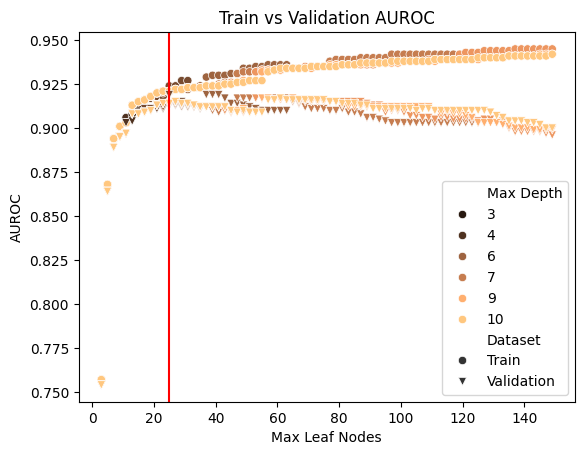

In [47]:
sns.scatterplot(errors_df_melted,
                x='Max Leaf Nodes',
                y='AUROC',
                hue='Max Depth',
                style='Dataset',
                markers=['o', 'v'],
                palette='copper')
plt.axvline(max_val_ln_auc, ls='-', c='r')
plt.title("Train vs Validation AUROC")
plt.show()

The best result on validation set is 0.919194 for `max_depth = 6` and `max_leaf_nodes = 37`

## **Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [48]:
test_df_preprocess = preprocess_new_data(
    test_df,
    input_cols=data_dict['input_cols'],
    numeric_cols=data_dict['numeric_cols'],
    categorical_cols=data_dict['categorical_cols'],
    encoder=data_dict['encoder'],
    scaler=data_dict['scaler']
)

In [49]:
model = DecisionTreeClassifier(max_depth=5, random_state=24)
model.fit(data_dict['train_X'], data_dict['train_y'])
predict_test_y = model.predict_proba(test_df_preprocess)[:, 1]

In [50]:
submission = pd.read_csv(data_dir + 'sample_submission.csv')
submission['Exited'] = predict_test_y

submission[:5]

,id,Exited
0,15000,0.186885
1,15001,0.034181
2,15002,0.034181
3,15003,0.756757
4,15004,0.034181


In [51]:
submission.to_csv(data_dir + 'submission_dt_max_depth_5.csv', index=False)

![dt_md5.JPG](./data/bank-customer-churn-prediction/dt_md5.JPG)


In [52]:
model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=37, random_state=24)
model.fit(data_dict['train_X'], data_dict['train_y'])
predict_test_y = model.predict_proba(test_df_preprocess)[:, 1]

submission = pd.read_csv(data_dir + 'sample_submission.csv')
submission['Exited'] = predict_test_y

submission.to_csv(data_dir + 'submission_dt_max_depth_6_max_leaf_nodes_37.csv', index=False)

![dt_md6_mln_37.JPG](./data/bank-customer-churn-prediction/dt_md6_mln_37.JPG)
